In [114]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from pylab import rcParams
print(os.listdir("./20180611_net5_speed0.02"))

['blocked_205_b.csv', '.DS_Store', 'ssrr_lno_output.txt', 'ssrr_lno.lp', 'input_demands2.txt', 'ssr_lno_output.txt', 'input_demands1.txt', 'operation_num.csv', 'blocked_205_b.txt', 'ssr_lno.lp', 'ssr_lno_result.txt', 'ssr_lno_running.txt', 'ssrr_lno_result.txt']


In [154]:
df_blocking = pd.read_csv('./20180611_net5_speed0.02/blocked_205_b.csv', names = ('load', 'speed', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [155]:
df_blocking_002 = df_blocking[(df_blocking['speed'] == 0.01)]

In [156]:
df_blocking_002

,load,speed,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,50,0.01,3,0,0,0,0
4,60,0.01,63,2,0,0,0
8,70,0.01,272,21,1,0,0
12,80,0.01,598,118,36,0,0
16,90,0.01,961,336,183,0,0
20,100,0.01,1300,641,455,0,0
24,110,0.01,1665,978,790,0,0
28,120,0.01,2004,1323,1134,0,0
32,130,0.01,2271,1626,1484,0,0
36,140,0.01,2539,1956,1776,0,0


In [159]:
for index, row in df_blocking_002.iterrows():
    df_blocking_002.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [160]:
df_blocking_002

,load,speed,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,50,0.01,0.0003,0.0000,0.0000,0.0,0.0
4,60,0.01,0.0063,0.0002,0.0000,0.0,0.0
8,70,0.01,0.0272,0.0021,0.0001,0.0,0.0
12,80,0.01,0.0598,0.0118,0.0036,0.0,0.0
16,90,0.01,0.0961,0.0336,0.0183,0.0,0.0
20,100,0.01,0.1300,0.0641,0.0455,0.0,0.0
24,110,0.01,0.1665,0.0978,0.0790,0.0,0.0
28,120,0.01,0.2004,0.1323,0.1134,0.0,0.0
32,130,0.01,0.2271,0.1626,0.1484,0.0,0.0
36,140,0.01,0.2539,0.1956,0.1776,0.0,0.0


In [161]:
plt.rcParams['figure.figsize'] = 10,8
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['font.family'] ='Times New Roman'#使用するフォント
plt.rcParams['font.size'] = 28 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

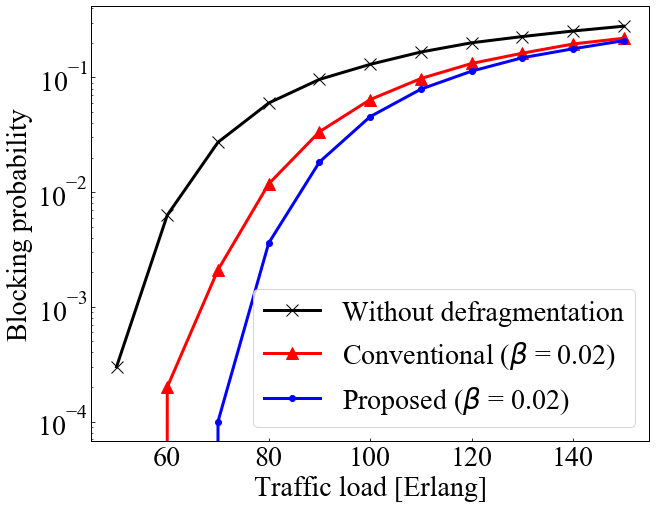

In [164]:
plt.yscale("log")
plt.plot(df_blocking_002['load'], df_blocking_002['Without defragmentation'], marker='x', markersize=12,  color="black", linewidth=3)
plt.plot(df_blocking_002['load'], df_blocking_002['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.02)'), marker='^', markersize=12,  color="red", linewidth=3)
plt.plot(df_blocking_002['load'], df_blocking_002['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.02)'), marker='.', markersize=12,  color="blue", linewidth=3)
plt.xlabel("Traffic load [Erlang]") # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend()
plt.savefig("./speeding_net5.pdf")

<Figure size 720x576 with 0 Axes>